# Task 1

# Simple Linear Regression Model with 2 Variables
 Here we will try to Predict the percentage of marks of a student based on the number of
study hours, using Linear Regression Model

### Task by KUNAL KAUDAN

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Importing the Scores and study per hour data inta a DataFrame
data=pd.read_csv("student_scores.csv")
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking the length of the Dataframe
len(data)

25

## Cleaning the Data

In [4]:
### 1. Checking for non numerical values
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
# Checking for missing values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

   Since the data is clean i.e does not contain non numerical values and missing values. It can be used with the machine learning model.

### Plotting the Data to have an idea of regression

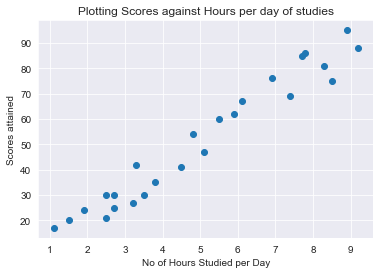

In [6]:
fig, ax = plt.subplots()
ax.scatter(data["Hours"],data["Scores"])
ax.set(xlabel="No of Hours Studied per Day",
       ylabel="Scores attained",
       title="Plotting Scores against Hours per day of studies");


#### Clearly we see a positive corelation between Hours of study per Day and Scores attained 

##### Gettng the Data Ready

In [7]:
# Dividing data into x and y variables
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values


In [8]:
# Importing training and testing model from scikit learn
from sklearn.model_selection import train_test_split

# Splitting the Data into Train and test sets 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


#### Training the model

In [9]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 


LinearRegression()

#### Predicting the values

In [10]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

[[1.5]
 [2.7]
 [7.4]
 [1.9]
 [3.3]]


In [11]:
# Comparing Actual vs Predicted
data_AP = pd.DataFrame({'Scores (Actual)': y_test, 'Scores (Predicted)': y_pred})  
data_AP 

,Scores (Actual),Scores (Predicted)
0,20,14.949220
1,30,27.224618
2,69,75.303259
3,24,19.041019
4,42,33.362317


In [12]:
df = pd.DataFrame([[9.25]], columns=['Hours'])
df

,Hours
0,9.25


In [13]:
# Checking the predicted score of a student if he studies for 9.25 hours per day
hours=9.25
own_pred = model.predict(df.values)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(own_pred[0], 2)))

No of Hours = 9.25
Predicted Score = 94.23


#### Evaluating the model

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

34.42905252155195

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.889366797809923